In [ ]:
import cv2 

img = cv2.imread(r'C:/Users/diego/OneDrive/Documentos/IA/incendiof.JPG')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

In [ ]:
import cv2
import os

# Ruta del archivo de imagen
file_path = r'C:/Users/diego/OneDrive/Documentos/IA/incendiof.jpg'

# Verificar si el archivo existe
if not os.path.exists(file_path):
    print(f"Error: El archivo no existe en la ruta especificada: {file_path}")
else:
    # Intentar leer la imagen desde la ruta especificada
    img = cv2.imread(file_path)

    # Verificar si la imagen se cargó correctamente
    if img is not None:
        print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))
    else:
        print("Error: No se pudo cargar la imagen. Verifica el formato del archivo y la ruta.")


# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(),'C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos') #cambiar ruta
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\asalto 1
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\incendio 6709
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\inundacion 10638
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\robo_casa 12156
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/Fotos\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 10638, 12156, 8765, 11706]
suma Total de imagenes en subdirs: 49975


/home/likcos/DataSets/sportimages/sportimages/futbol 5172


/home/likcos/DataSets/sportimages/sportimages/beisball 7617


/home/likcos/DataSets/sportimages/sportimages/f1 7752


/home/likcos/DataSets/sportimages/sportimages/ciclismo 5053


/home/likcos/DataSets/sportimages/sportimages/golf 7533
/home/likcos/DataSets/sportimages/sportimages/boxeo 9768
/home/likcos/DataSets/sportimages/sportimages/tenis 7125
/home/likcos/DataSets/sportimages/sportimages/basket 8937
Directorios leidos: 10
Imagenes en cada directorio [9349, 5172, 7617, 7752, 5053, 7533, 9768, 7125, 8937, 8822]
suma Total de imagenes en subdirs: 77128


# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  49975


In [5]:
desastres=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    desastres.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo_casa
4 tornado


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (39980, 28, 28, 3) (39980,)
Testing data shape :  (9995, 28, 28, 3) (9995,)


Text(0.5, 1.0, 'Ground Truth : 4')

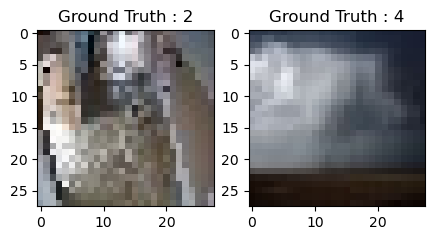

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

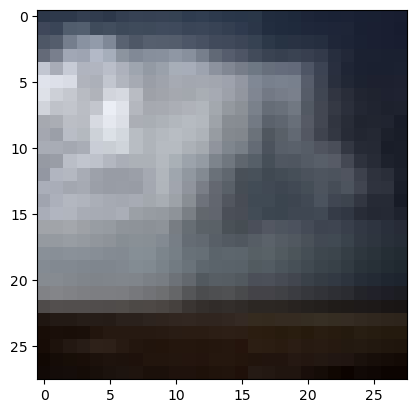

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(31984, 28, 28, 3) (7996, 28, 28, 3) (31984, 5) (7996, 5)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
disaster_model = Sequential()
disaster_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
disaster_model.add(LeakyReLU(alpha=0.1))
disaster_model.add(MaxPooling2D((2, 2),padding='same'))
disaster_model.add(Dropout(0.5))


disaster_model.add(Flatten())
disaster_model.add(Dense(32, activation='linear'))
disaster_model.add(LeakyReLU(alpha=0.1))
disaster_model.add(Dropout(0.5))
disaster_model.add(Dense(nClasses, activation='softmax'))

C:\Users\diego\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\diego\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
disaster_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#disaster_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
disaster_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
#sport_train = disaster_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
sport_train = disaster_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2865 - loss: 1.5694 - val_accuracy: 0.5924 - val_loss: 1.3463
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4791 - loss: 1.3536 - val_accuracy: 0.7095 - val_loss: 1.0578
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5799 - loss: 1.1326 - val_accuracy: 0.7508 - val_loss: 0.8580
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6418 - loss: 0.9779 - val_accuracy: 0.7760 - val_loss: 0.7402
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6833 - loss: 0.8806 - val_accuracy: 0.7984 - val_loss: 0.6572
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7058 - loss: 0.8158 - val_accuracy: 0.8275 - val_loss: 0.6049
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7289 - loss: 0.7617 - val_accuracy: 0.8420 - val_loss: 0.5619
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7477 - loss: 0.7161 - val_accu

In [18]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
disaster_model.save("C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/desastres3.h5")

# Evaluamos la red

In [19]:
test_eval = disaster_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9248 - loss: 0.2890


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.29094362258911133
Test accuracy: 0.9238619208335876


In [21]:
sport_train.history

{'accuracy': [0.339263379573822,
  0.5069409608840942,
  0.5954226851463318,
  0.6516070365905762,
  0.6924086809158325,
  0.71151202917099,
  0.7374937534332275,
  0.7551588416099548,
  0.7688218951225281,
  0.783673107624054,
  0.7975863218307495,
  0.8088106513023376,
  0.818190336227417,
  0.8270697593688965,
  0.8379502296447754,
  0.8452351093292236,
  0.8509567379951477,
  0.8561468124389648,
  0.8601800799369812,
  0.8666520714759827],
 'loss': [1.5195080041885376,
  1.2976036071777344,
  1.0943361520767212,
  0.9556403160095215,
  0.8569157123565674,
  0.7981868982315063,
  0.7453161478042603,
  0.699735701084137,
  0.6668369174003601,
  0.6328082084655762,
  0.6028215289115906,
  0.5795390605926514,
  0.5587025880813599,
  0.5314387083053589,
  0.5117535591125488,
  0.49578288197517395,
  0.4844610393047333,
  0.46990400552749634,
  0.4534158706665039,
  0.44312119483947754],
 'val_accuracy': [0.5924212336540222,
  0.7094797492027283,
  0.7507503628730774,
  0.776013016700744

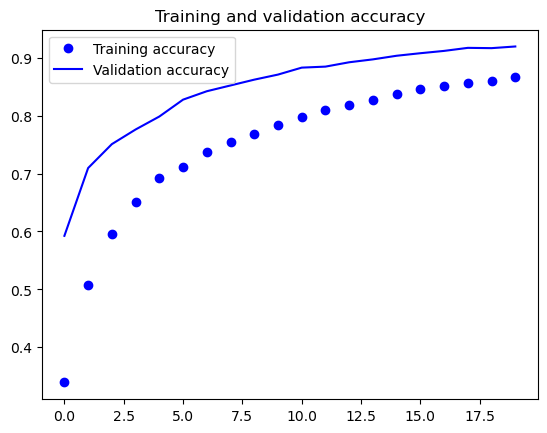

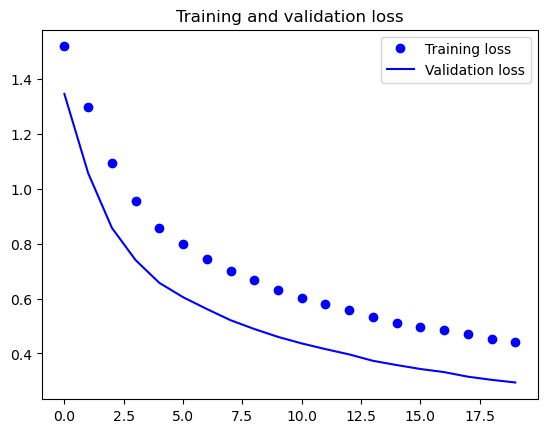

In [22]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = disaster_model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((9995,), (9995,))

# Aprendamos de los errores: Qué mejorar

Found 9234 correct labels


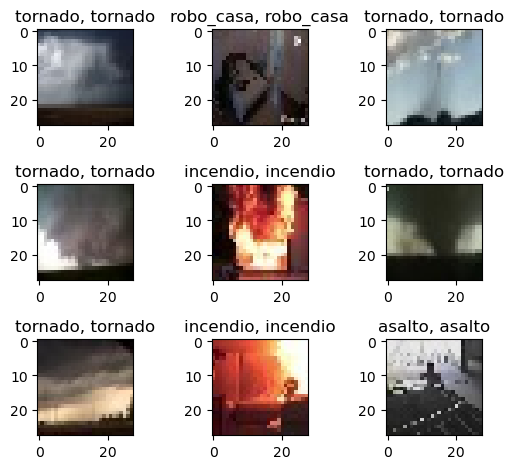

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[correct]],
                                                    desastres[test_Y[correct]]))

    plt.tight_layout()

Found 761 incorrect labels


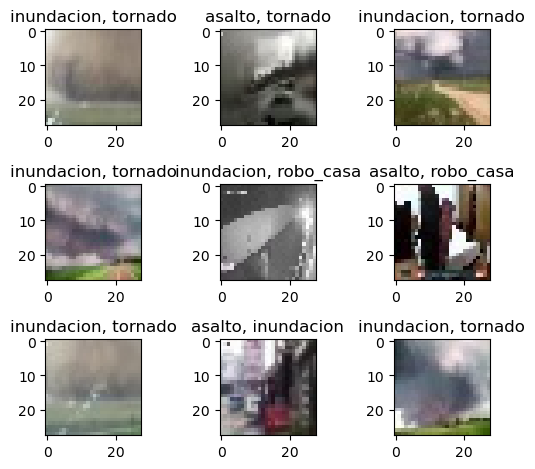

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(desastres[predicted_classes[incorrect]],
                                                    desastres[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.92      0.89      0.91      1318
     Class 1       0.99      0.98      0.99      2102
     Class 2       0.84      0.92      0.87      2462
     Class 3       0.95      0.94      0.94      1783
     Class 4       0.95      0.89      0.92      2330

    accuracy                           0.92      9995
   macro avg       0.93      0.92      0.93      9995
weighted avg       0.93      0.92      0.92      9995



In [29]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/incendiof.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = disaster_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], desastres[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/incendiof.jpg incendio


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


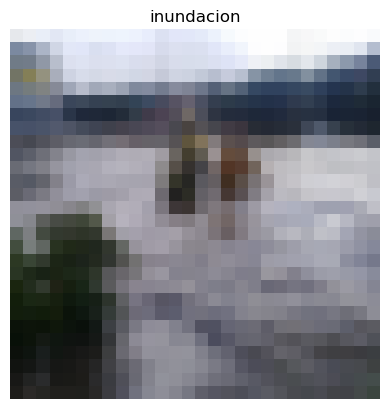

C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/inundacionf2.jpg inundacion


In [31]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
import tensorflow as tf  # Asegúrate de tener TensorFlow importado

images = []
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/inundacionf2.jpg']


for filepath in filenames:
    image = plt.imread(filepath)
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.float32)  # Convierto de lista a numpy y aseguro que es de tipo float
test_X = X / 255.0  # Normalizo las imágenes

# Realiza las predicciones
predicted_classes = disaster_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    plt.imshow(images[i] / 255.0)  # Asegurarse de que los datos estén en el rango [0..1]
    plt.title(desastres[np.argmax(img_tagged)])
    plt.axis('off')  # Opcional: desactivar los ejes para una mejor visualización
    plt.show()
    print(filenames[i], desastres[np.argmax(img_tagged)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


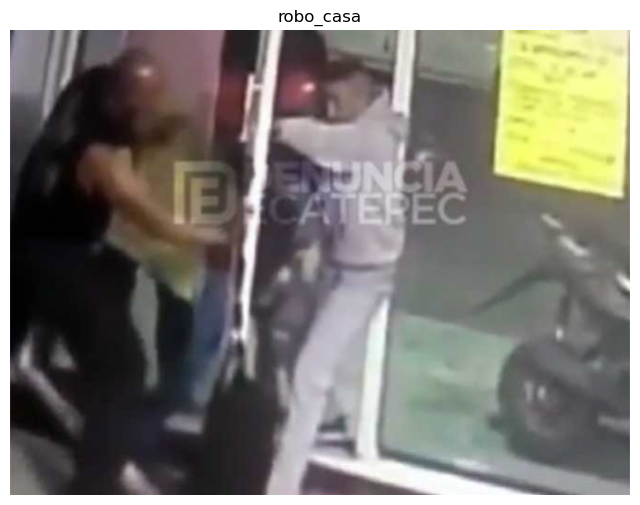

C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/asalto1.jpg robo_casa


In [35]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
import tensorflow as tf  # Asegúrate de tener TensorFlow importado


desastres = ['asalto', 'incendio', 'inundacion', 'robo_casa', 'tornado'] 

# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/diego/OneDrive/Documentos/IA/Proyecto4/asalto1.jpg']

images = []
original_images = []

for filepath in filenames:
    image = plt.imread(filepath)
    original_images.append(image)  # Guarda la imagen original para la visualización
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.float32)  # Convierto de lista a numpy y aseguro que es de tipo float
test_X = X / 255.0  # Normalizo las imágenes

# Realiza las predicciones
predicted_classes = disaster_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    plt.figure(figsize=(8, 8))  # Ajusta el tamaño de la figura para evitar pixelado
    plt.imshow(original_images[i] / 255.0)  # Muestra la imagen original
    plt.title(desastres[np.argmax(img_tagged)])
    plt.axis('off')  # Opcional: desactivar los ejes para una mejor visualización
    plt.show()
    print(filenames[i], desastres[np.argmax(img_tagged)])



